# The data

This data was obtained from a popular blog known as "Ask A Manager" https://www.askamanager.org. A survey posted on this blog asked readers from around the world to anonymously fill out how much money they were making. The data is interesting, since self-reported compensation data is hard to come by and useful for anyone on the job market.

The goal for this project is to clean up the data and perform some exploratory data analysis and gain some insights from the data.


# Imports

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"
pio.templates.default = "plotly_dark" 

In [2]:
salary_survey= pd.read_csv("C:\\Users\\user\\Desktop\\Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.csv")

In [3]:
salary_survey.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [4]:
salary_survey.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

## Renaming the columns to improve readability

In [5]:
#Renaming the columns
salary_survey.columns=['Timestamp', 'Age', 'Industry', 'Job Title', 'Job Title Additional Context', 'Annual Salary', 'Extra Perks', 'Currency', 'Other', 'Income Additional Context', 'Country', 'State', 'City', 'Experience Overall', 'Experience', 'Education', 'Gender', 'Race' ]

In [6]:
salary_survey.columns

Index(['Timestamp', 'Age', 'Industry', 'Job Title',
       'Job Title Additional Context', 'Annual Salary', 'Extra Perks',
       'Currency', 'Other', 'Income Additional Context', 'Country', 'State',
       'City', 'Experience Overall', 'Experience', 'Education', 'Gender',
       'Race'],
      dtype='object')

In [7]:
salary_survey.head()

,Timestamp,Age,Industry,Job Title,Job Title Additional Context,Annual Salary,Extra Perks,Currency,Other,Income Additional Context,Country,State,City,Experience Overall,Experience,Education,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


# Dropping columns that will not be used in this analysis

In [8]:
col_drop= [i for i in salary_survey.columns if i in ['Job Title Additional Context', 'Other', 'Income Additional Context','Experience Overall']]

In [9]:
salary_survey.drop(col_drop, axis=1, inplace= True)

## Observing NaN Features

In [10]:
salary_survey.isnull()

,Timestamp,Age,Industry,Job Title,Annual Salary,Extra Perks,Currency,Country,State,City,Experience,Education,Gender,Race
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27863,False,False,False,False,False,True,False,False,True,False,False,False,False,False
27864,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27865,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [11]:
salary_survey.isnull().sum()

Timestamp           0
Age                 0
Industry           71
Job Title           0
Annual Salary       0
Extra Perks      7223
Currency            0
Country             0
State            4959
City               75
Experience          0
Education         211
Gender            165
Race              165
dtype: int64

## Creating a function to show percentage of missing data 
#### This will help us to determine how to deal with rows or columns that have either a high percentage or a low percentage of missing data.

In [12]:
def percent_missing(salary_survey):
    percent_nan = 100* salary_survey.isnull().sum() / len(salary_survey)  #Returns percentage of missing data
    percent_nan = percent_nan[percent_nan>0].sort_values() #Sorts the percentages greater than zero in ascending or descending order
    return percent_nan

In [13]:
percent_nan= percent_missing(salary_survey)
percent_nan

Industry        0.254782
City            0.269136
Gender          0.592098
Race            0.592098
Education       0.757168
State          17.795242
Extra Perks    25.919546
dtype: float64

## Visualizing percentage of missing data

#### Extra Perks feature has the highest percentage of  missing data, while Industry feature has the lowest percentage.

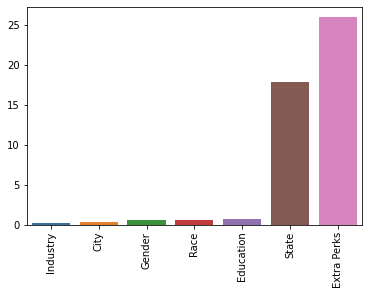

In [14]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Filling in Data or Dropping Data

If only a few rows relative to the size of the dataset are missing some values, then it might just be a good idea to drop those rows. Sometimes it is a good idea to remove a column entirely if it has too many null values. However, we should carefully consider why it has so many null values and decide whether to remove or fill in the missing data based off domain expertise and knowledge of the data.

Generally, it's a good idea to remove rows when the missing percentage is low(less than 1%) AND removing columns if the missing
percentage is high.

 
In this dataset, most of the missing data could be attributed to human error, i.e, wrongly filling in of the data, the subjects don't have data for all the required features, or some of the features don't cut across the board. E.g, features for US citizens do not apply to people outside the US.

Since the missing data is important and also unique to each individual, the best way to handle the missing values is to fill the missing numeric values with a number--> fillna(0), or to fill the missing string features with string 'None'--> fillna('None'). 

####  String columns

In [15]:
# Filling salary_survey string columns with NaN features with string 'None'--> fillna('None')
str_cols =['Industry', 'City', 'Gender', 'Race', 'Education', 'State']
salary_survey[str_cols] = salary_survey[str_cols].fillna('None')

#### Numeric column

In [16]:
# Filling salary_survey numeric column with Nan features with a number--> fillna(0)
num_col =['Extra Perks']
salary_survey[num_col] = salary_survey[num_col].fillna(0)

In [17]:
salary_survey.isnull().sum()

Timestamp        0
Age              0
Industry         0
Job Title        0
Annual Salary    0
Extra Perks      0
Currency         0
Country          0
State            0
City             0
Experience       0
Education        0
Gender           0
Race             0
dtype: int64

## Converting Other Currencies To USD To Extract Meaningful Values

#### We will create a function that converts currency in realtime using exchangerate API

In [18]:
# Importing the necessary libraries

import requests
from tkinter import *
import tkinter as tk
from tkinter import ttk

In [19]:
#Creating the currency conversion function

class RealTimeCurrencyConverter():
    def __init__(self,url):
        self.data= requests.get(url).json()
        self.currencies = self.data['rates']
    def convert(self, from_currency, to_currency, amount): 
        initial_amount = amount 
        if from_currency != 'USD':
            amount = amount / self.currencies[from_currency]
            amount = round(amount * self.currencies[to_currency], 2) 
            return amount

# Using our function with exchangerate API to convert other currencies to USD.        
url = 'https://api.exchangerate-api.com/v4/latest/USD'
converter = RealTimeCurrencyConverter(url)
print(converter.convert('CAD','USD', 1))

0.73


In [20]:
currencies = salary_survey.Currency.unique().tolist() # Displays the unique currencies in a list
currencies = dict.fromkeys(currencies) #Creates a dictionary with the currencies as keys

In [21]:
# Showing non-USD currencies conversion rates to USD
# We used the function we created above to obtain the conversion rates.

currencies['CAD'] = 0.77
currencies['GBP'] = 1.17
currencies['EUR'] = 1
currencies['AUD/NZD'] = 0.62
currencies['Other'] = 1
currencies['CHF'] = 1.04
currencies['SEK'] = 0.09
currencies['JPY'] = 0.0073
currencies['ZAR'] = 0.06
currencies['HKD'] = 0.13
currencies['USD'] = 1

### The Annual Salary and the Extra Perks columns show payment in different currencies, hence, we need to convert them to USD.

In [22]:
salary_survey['Annual Salary']=salary_survey['Annual Salary'].str.replace(',', '').astype(float)

In [23]:
# Converting Annual Salary column non-USD currencies to USD
salary_survey['Amount_Conv'] = salary_survey.apply(lambda x: x['Annual Salary'] * currencies[x.Currency], axis=1).astype(int)

In [24]:
# Converting Extra Perks column non-USD currencies to USD
salary_survey ['Perk_Conv'] =salary_survey.apply(lambda x: x['Extra Perks'] * currencies[x.Currency], axis=1).astype(int) 

## Cleaning Country Column

#### This column has a lot of wrongly formatted data. For example, for the United States, some entries appear as 'U.S', 'U.S.A ', 'United States of America', 'us', 'US of A' etc. For a more accurate analysis, these have to be cleaned so that they can all be captured for analysis.

#### We will use dataprep for this task.

In [25]:
# Before cleaning, we can see different formats for USA.

salary_survey['Country'].value_counts().head(10)

United States     8938
USA               7902
US                2594
Canada            1558
United States      659
U.S.               577
UK                 571
United Kingdom     542
USA                468
Usa                445
Name: Country, dtype: int64

In [26]:
#Importing the necessary modules

from dataprep.clean import clean_country 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
#Cleaning using dataprep

salary_survey = clean_country(salary_survey, "Country", fuzzy_dist=2)

  0%|                                                                                            | 0/8 [00:00<…

Country Cleaning Report:
	15591 values cleaned (55.95%)
Result contains 27867 (100.0%) values in the correct format and 0 null values (0.0%)


In [28]:
#Result after cleaning
salary_survey['Country_clean'].value_counts().head(10)

United States     22924
Canada             1677
United Kingdom     1347
Australia           388
Germany             193
Angola              180
New Zealand         131
Ireland             125
Niue                 90
Netherlands          89
Name: Country_clean, dtype: int64

## Dropping redundant columns after cleaning

In [29]:
salary_survey.columns

Index(['Timestamp', 'Age', 'Industry', 'Job Title', 'Annual Salary',
       'Extra Perks', 'Currency', 'Country', 'State', 'City', 'Experience',
       'Education', 'Gender', 'Race', 'Amount_Conv', 'Perk_Conv',
       'Country_clean'],
      dtype='object')

In [30]:
to_drop= [i for i in salary_survey.columns if i in ['Annual Salary', 'Country','Extra Perks']]

In [31]:
salary_survey.drop(to_drop, axis=1, inplace= True) 

In [32]:
#Renaming some of the changed columns
salary_survey.rename({'Amount_Conv': 'Annual Salary (USD)', 'Perk_Conv': 'Extra Perks (USD)', 'Country_clean':'Country'}, axis=1, inplace=True)

In [33]:
salary_survey.head()

,Timestamp,Age,Industry,Job Title,Currency,State,City,Experience,Education,Gender,Race,Annual Salary (USD),Extra Perks (USD),Country
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,USD,Massachusetts,Boston,5-7 years,Master's degree,Woman,White,55000,0,United States
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,GBP,None,Cambridge,5-7 years,College degree,Non-binary,White,63881,4680,United Kingdom
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,USD,Tennessee,Chattanooga,2 - 4 years,College degree,Woman,White,34000,0,United States
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,USD,Wisconsin,Milwaukee,5-7 years,College degree,Woman,White,62000,3000,United States
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,USD,South Carolina,Greenville,5-7 years,College degree,Woman,White,60000,7000,United States


In [34]:
#Rearranging the column names
salary_survey=salary_survey[['Timestamp', 'Age', 'Industry', 'Job Title','Annual Salary (USD)','Extra Perks (USD)', 'Currency', 'Country','State','City', 'Experience', 'Education', 'Gender','Race']]

### Further cleaning of the industries column.

In [35]:
salary_survey['Industry'].replace(['Library', 'Libraries', 'Public libraries','Public Libraries' ], 'Public Library', inplace=True)
salary_survey['Industry'].replace(['Biotechnology', 'Biopharma', 'Bioinformatics','Biotech','Biotech/software', 'Biotech R&D', 'Biotech Research'], 'Biotechnology', inplace=True)
salary_survey['Industry'].replace(['Engineering or Manufacturing ','manufacturing' 'Manufacturing'], 'Engineering or Manufacturing', inplace=True)
salary_survey['Industry'].replace(['Publishing','Book Publishing', 'Educational Publishing'], 'Publishing', inplace=True)
salary_survey['Industry'].replace(['Research','Scientific Research' 'Market Research', 'Clinical Research'], 'Research', inplace=True)

## GETTING INSIGHTS FROM THE DATA

##  Industries with the highest number of respondents

Computing or Tech                       4657
Education (Higher Education)            2452
Nonprofits                              2412
Health care                             1882
Government and Public Administration    1881
Accounting, Banking & Finance           1788
Engineering or Manufacturing            1684
Marketing, Advertising & PR             1120
Law                                     1095
Business or Consulting                   847
Education (Primary/Secondary)            830
Media & Digital                          771
Insurance                                529
Retail                                   500
Recruitment or HR                        458
Property or Construction                 383
Utilities & Telecommunications           355
Art & Design                             354
Transport or Logistics                   303
Sales                                    284
Social Work                              270
Hospitality & Events                     258
Entertainm

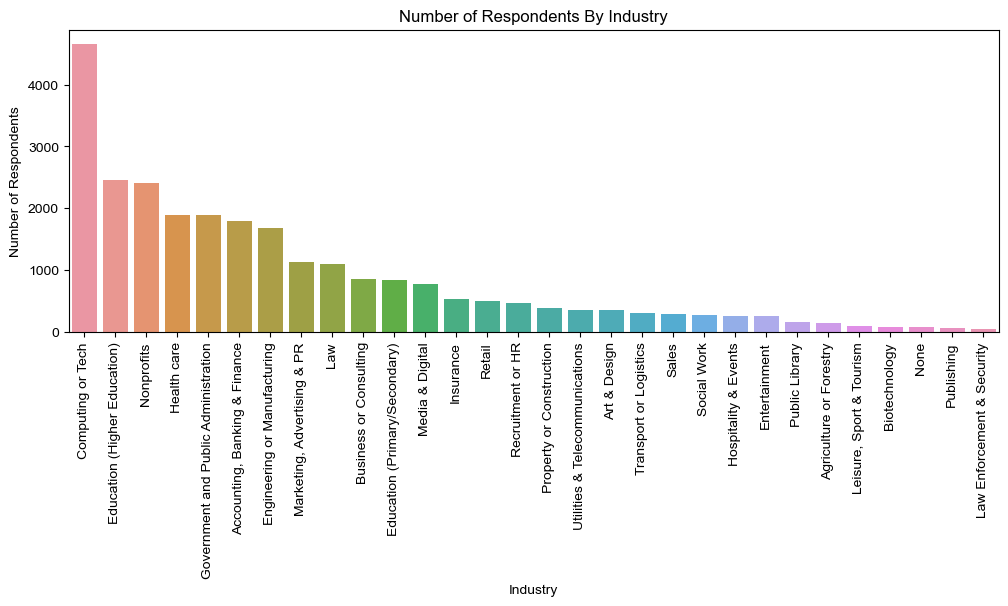

In [36]:
# Visualizing industries with the highest number of respondents
print(salary_survey['Industry'].value_counts().head(30))

top_industries= salary_survey['Industry'].value_counts().head(30)
plt.figure(figsize=(12,4), dpi=100)
sns.barplot(x=top_industries.index, y=top_industries)
plt.title("Number of Respondents By Industry")
plt.ylabel("Number of Respondents")
plt.xlabel("Industry")
plt.style.use('seaborn-darkgrid')
plt.xticks(rotation=90);

## The most lucrative industries to work in-- industries with the highest salaries.

In [37]:
# Some people did not input definitive currencies, eg USD, GBP, JPY, etc, and instead input 'Other'
# We have to remove 'Other' since we could not convert it to USD, and hence it has some extreme values on the higher end.

correct_currency= salary_survey[~salary_survey['Currency'].isin(['Other'])][['Annual Salary (USD)', 'Industry']]

In [38]:
# Removing the outliers. I removed all salaries below 100 USD and above 1000000 USD.

correct_currency = correct_currency[(correct_currency['Annual Salary (USD)'] > 100) & (correct_currency['Annual Salary (USD)'] < 1000000)]

In [39]:
# Grouping the industries by maximum Annual Salary and sorting them in descending order.
# I filtered the top 20 highest paying industries.

temp=correct_currency.groupby(['Annual Salary (USD)']).max().sort_values(by='Annual Salary (USD)', ascending=False).head(150)

In [40]:
temp

,Industry
Annual Salary (USD),
954000,Computing or Tech
950000,Computing or Tech
925000,Law
920000,Computing or Tech
875000,Computing or Tech
...,...
231000,Computing or Tech
230100,Computing or Tech
230000,Pharmaceutical Development


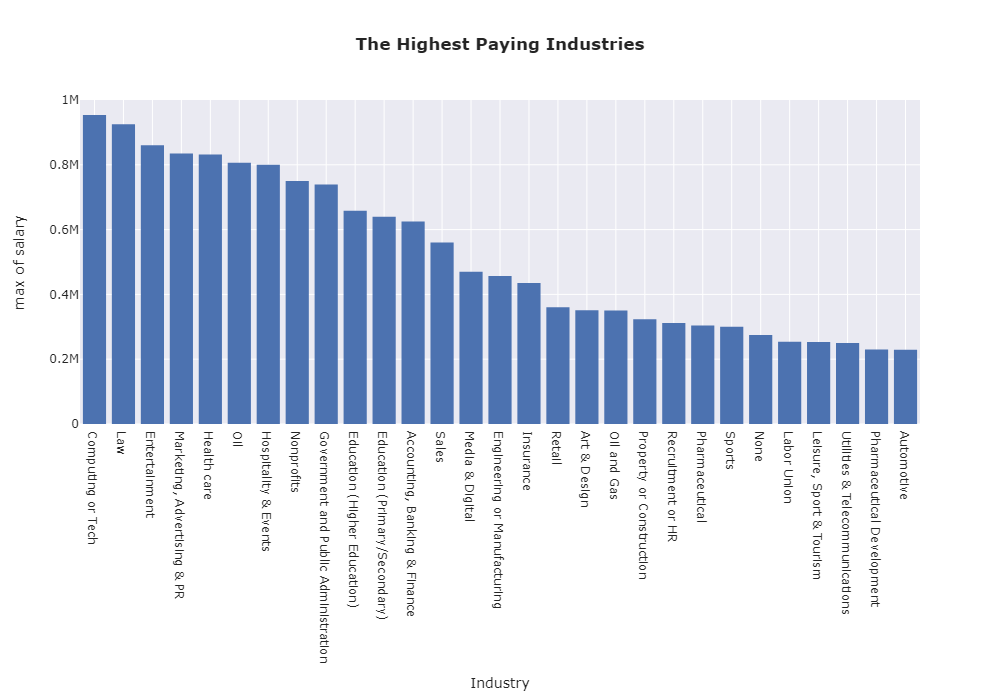

In [41]:
# Visualizing the highest paying industries

fig = px.histogram(x=temp.Industry, y=temp.index, histfunc='max', template='seaborn', labels=dict(y='salary', x='Industry'),
                  title="<b> The Highest Paying Industries </b>")
fig.update_layout(yaxis_range=[0,1000000],width=1000, height=700 )
fig.show()


According to the data, the highest paying industry is Computing or Tech followed by Law. Throughout the analysis, Computing or Tech came up as the industry with the highest salaries compared to other industries.

# How do  salaries differ by gender and years of work experience?

In [42]:
temp2= salary_survey[~salary_survey['Currency'].isin(['Other'])][['Annual Salary (USD)', 'Gender', 'Education','Experience']]

In [43]:
temp2 = temp2[(temp2['Annual Salary (USD)'] > 100) & (correct_currency['Annual Salary (USD)'] < 1000000)]

In [44]:
temmp2=temp2.groupby(['Annual Salary (USD)']).max().sort_values(by='Annual Salary (USD)', ascending=False)

In [45]:
temmp2

,Gender,Education,Experience
Annual Salary (USD),,,
954000,Woman,Some college,8 - 10 years
950000,Man,College degree,11 - 20 years
925000,Man,"Professional degree (MD, JD, etc.)",21 - 30 years
920000,Man,College degree,2 - 4 years
875000,Man,College degree,2 - 4 years
...,...,...,...
145,Woman,College degree,2 - 4 years
130,Woman,Some college,8 - 10 years
110,Woman,Master's degree,21 - 30 years


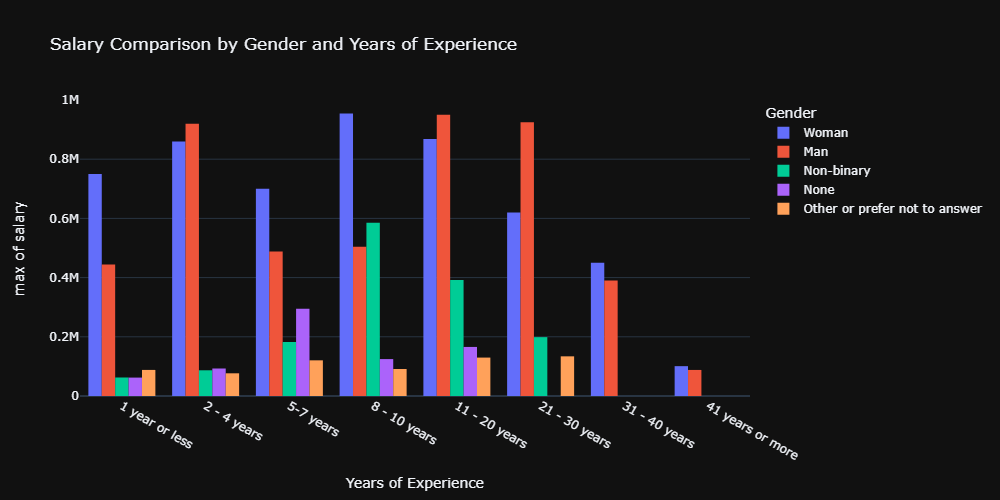

In [46]:
fig = px.histogram(y=temmp2.index, x=temmp2.Experience, color= temmp2.Gender, barmode='group', histfunc='max', 
                   title=" Salary Comparison by Gender and Years of Experience </b>", labels=dict(y='salary', x='Years of Experience', color='Gender'),
                  category_orders={'x': ['1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years', '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more']})
fig.update_layout(yaxis_range=[0,1000000], width = 1000, height = 500)
fig.show()

There seems to be a positive correlation between salary and years of experience for all genders across the board.

However, upto a certain point, we see a general decline in salary even as the years of experience increase.

The 'sweet spot' seems to be between 2 to 30 years of experience. Beyond that, it seems like more experience does not necessarily yield a higher salary.

Between 8 to 30 years of experience, female salary tends to decrease as the years of experience increase, while for their male counterparts, the salary tends to increase as the years of experience increase.


#  Salary comparison by gender and level of education

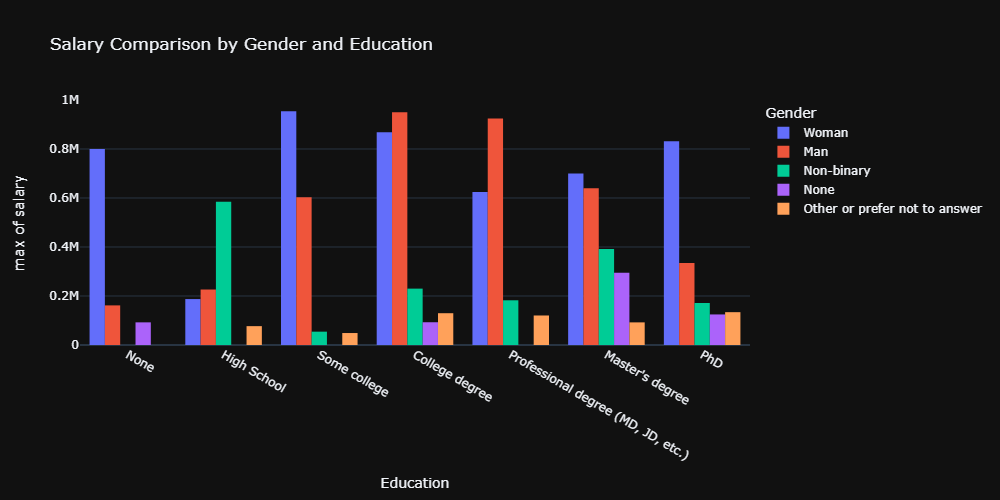

In [47]:
fig = px.histogram(y=temmp2.index, x=temmp2.Education, color= temmp2.Gender, barmode='group', histfunc='max', 
                   title=" Salary Comparison by Gender and Education </b>", labels=dict(y='salary', x='Education', color='Gender'),
                  category_orders={'x': ['None', 'High School', 'Some college', 'College degree', 'Professional degree (MD, JD, etc.)', "Master's degree", 'PhD']})
fig.update_layout(yaxis_range=[0,1000000], width = 1000, height = 500)
fig.show()

The highest earner in this category is a man whose level of education is a college degree.

The lowest earner is in the prefer not to answer category, whose level of education is some college.

Men and women report higher salaries than non-binary, none, or other category.

Women seem to lead in none, some college, master's degree and PhD level of education, while men are leading in the college and Professional degree.

Non-binary are leading in high school, and they're also doing fairly well with Master's degree.



# Salary comparison by level of education and years of work experience.

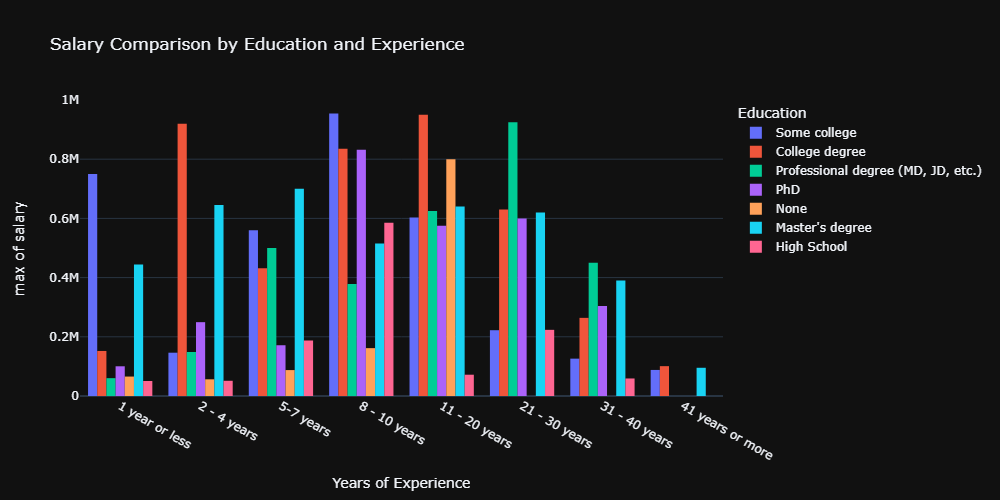

In [48]:
fig = px.histogram(y=temmp2.index, x=temmp2.Experience, color= temmp2.Education, barmode='group', histfunc='max', 
                   title=" Salary Comparison by Education and Experience </b>", labels=dict(y='salary', x='Years of Experience', color='Education'),
                  category_orders={'x': ['1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years', '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more']})
fig.update_layout(yaxis_range=[0,1000000], width = 1000, height = 500)
fig.show()

The highest earner in this category has some college level of education and 8 to 10 years of experience in their industry.

The second highest earner is a college degree holder with 11 to 20 years of experience.

Master's degree holders with 2 to 7 years of experience seem to earn a bit more than Master's degree holders with more than seven years of experience.

# Country wise disparities among people with the same age and same job title

In [49]:
# Removing 'Other' currency
df1=salary_survey[~salary_survey['Currency'].isin(['Other'])][['Annual Salary (USD)', 'Age', 'Job Title','Country']]

In [50]:
# Removing outliers
df1= df1[(df1['Annual Salary (USD)'] > 100) & (correct_currency['Annual Salary (USD)'] < 1000000)]

In [51]:
# Filtering Job Title column
df2=df1[df1['Job Title'].isin(['Software Engineer'])]

In [52]:
# Finding the maximum salary for each age group by country
df2=df2.groupby(['Country', 'Age']).max()

In [53]:
df2

Annual Salary (USD)          Job Title
Country        Age                                          
Australia      18-24                55800  Software Engineer
               25-34               155000  Software Engineer
               35-44                62000  Software Engineer
               45-54               136400  Software Engineer
Austria        25-34                60000  Software Engineer
               35-44                70000  Software Engineer
Burkina Faso   25-34                59040  Software Engineer
Canada         18-24                94710  Software Engineer
               25-34               115000  Software Engineer
               35-44                69300  Software Engineer
               45-54               115500  Software Engineer
France         25-34                65000  Software Engineer
               35-44                70000  Software Engineer
Germany        25-34               130000  Software Engineer
               35-44                92000  Software Engineer
Greece         25-34                10800  Software Engineer
India          35-44               100000  Software Engineer
Ireland        25-34                95000  Software Engineer
               35-44                57000  Software Engineer
Israel         25-34                95000  Software Engineer
               35-44               240000  Software Engineer
Luxembourg     25-34                91000  Software Engineer
Netherlands    25-34                80000  Software Engineer
Niue           25-34               112200  Software Engineer
Sweden         25-34                51084  Software Engineer
Switzerland    25-34               116480  Software Engineer
United Kingdom 18-24                81315  Software Engineer
               25-34               125189  Software Engineer
               35-44               118170  Software Engineer
               55-64               139932  Software Engineer
United States  18-24               195000  Software Engineer
               25-34               875000  Software Engineer
               35-44               358000  Software Engineer
               45-54               232000  Software Engineer
               55-64               145000  Software Engineer

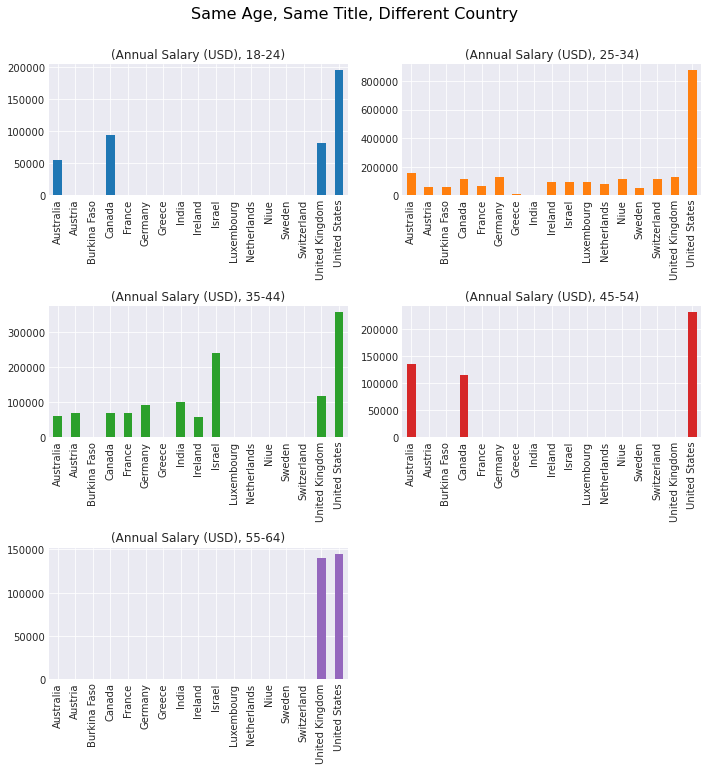

In [54]:
ax = df2.unstack(level=1).plot(kind='bar', subplots=True, rot=90, figsize=(10,20), layout=(6,2), fontsize=10, legend=False, xlabel='')
ax[0][0].tick_params(axis= 'x', labelbottom=True, labelrotation=90)
ax[0][1].tick_params(axis= 'x', labelbottom=True, labelrotation=90)
ax[1][0].tick_params(axis= 'x', labelbottom=True, labelrotation=90)
plt.style.use('classic')
plt.suptitle('Same Age, Same Title, Different Country', fontsize=16)
 
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

Software engineer as a title was used in this part of the analysis since it had the most entries per country. 

There are some clear disparities among software engineers in different countries. 

United States has the highest salaries for this role in all the age groups. Canada and United Kingdom seem to be almost at par in their salary range for this role. 

The most common age group for this role in all countries is between 25 and 44 years, which is also the age group that registers the highest salaries across the board for the role.

The person with the highest salary for the role is in the United States. They are in age group 25-34 years. They earn 87500 USD.

The person with the lowest salary for the role is in Greece. They are in age group 25-34 years. They earn 10800 USD

# Is there a correlation between graduating earlier or later and salary? 

In [55]:
df3=salary_survey[~salary_survey['Currency'].isin(['Other'])][['Annual Salary (USD)', 'Age', 'Education']]

In [56]:
df3=df3[(df3['Annual Salary (USD)'] > 100) & (correct_currency['Annual Salary (USD)'] < 1000000)]

In [57]:
df3

,Annual Salary (USD),Age,Education
0,55000,25-34,Master's degree
1,63881,25-34,College degree
2,34000,25-34,College degree
3,62000,25-34,College degree
4,60000,25-34,College degree
...,...,...,...
27862,62700,35-44,College degree
27863,71610,45-54,PhD
27864,96000,35-44,College degree
27865,64000,25-34,College degree


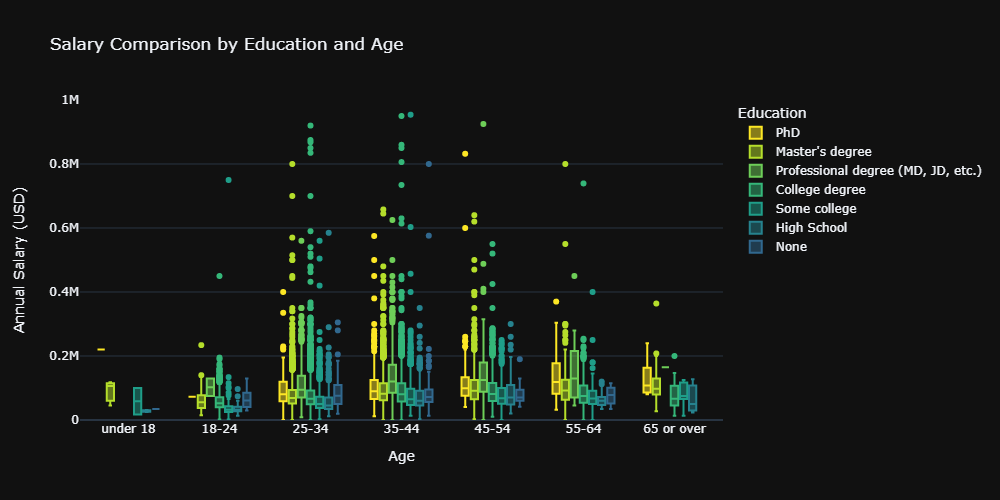

In [58]:
fig= px.box(data_frame=df3, y=df3['Annual Salary (USD)'], x='Age', 
            color='Education', color_discrete_sequence= px.colors.sequential.Viridis_r, title=" Salary Comparison by Education and Age </b>",
            category_orders={'Age': ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over' ],
                            'Education': ['PhD', "Master's degree", 'Professional degree (MD, JD, etc.)', 'College degree', 'Some college', "High School", 'None']})
fig.update_layout(yaxis_range=[0,1000000],autosize=False,boxgroupgap=0.2,
    width=1000,
    height=500,)
fig.show()

 In some cases, people who graduate a little later from university earn more than their peers graduating earlier in life.
 
 For example, college degree holders aged 35-44 earn more that college degree holders between 18 to 34 years.
 
 PhD holders aged 45-54 earn more than those who graduated with a PhD earlier than that.
 
 Professional degree holders aged 45-54 also earn more than those who graduated earlier than that.
 
 Generally, though, there seems to be no correlation between when one graduated and their salary.